In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic')

In [3]:
os.listdir('./Data/독립변수_v2')

['2020_가축분뇨_발생량.xlsx',
 '2020_가축분뇨_처리농가수.xlsx',
 '2020_가축분뇨_처리량..xlsx',
 '2020_농가수_두수.xlsx',
 '2020년도 가축분뇨공공처리시설 운영현황(홈페이지 게시).xlsx',
 '202208_202208_연령별인구현황_월간.csv',
 '시군구 목장용지.xlsx',
 '시군구_면적.xlsx',
 '전국 토지활용 현황.xlsx',
 '전국_읍면동_면적.xlsx',
 '폭염_읍면동통합.xlsx']

# 독립변수 

In [359]:
os.listdir()

['.ipynb_checkpoints',
 'Data',
 'EDA.ipynb',
 'merge2020.ipynb',
 '독립변수_v2.ipynb',
 '독립변수_v2.xlsx',
 '파생변수_읍면동_농가비율.xlsx',
 '폭염_읍면동통합.xlsx',
 '폭염_읍면동통합_groupby.xlsx',
 '환경부_전처리.ipynb']

In [364]:
pd.read_excel('독립변수_v2.xlsx')

,시도,시군,읍면동
0,서울특별시,서울특별시,서울특별시
1,서울특별시,종로구,종로구
2,서울특별시,종로구,청운효자동
3,서울특별시,종로구,사직동
4,서울특별시,종로구,삼청동
...,...,...,...
3866,제주특별자치도,서귀포시,서홍동
3867,제주특별자치도,서귀포시,대륜동
3868,제주특별자치도,서귀포시,대천동
3869,제주특별자치도,서귀포시,중문동


In [365]:
import pandas as pd
import numpy as np
주소 = pd.DataFrame(pd.read_excel('./Data/독립변수/행정동_주소.xlsx'))
dt = pd.DataFrame(pd.read_excel('독립변수_v2.xlsx'))
dict_add = {}
주소['key'] = 주소['시군']+주소['법정동']
dt['key'] = dt['시군']+dt['읍면동']
dt1 = pd.merge(dt, 주소[['key','읍면동']],on='key',how='left')
# dt1[dt1['읍면동_y'].isnull().to_list()]
idx = dt1[dt1['읍면동_y'].notnull().to_list()]
idx['읍면동_x'] = idx['읍면동_y']
dt1 = dt1.drop(idx.index)
dt1 = pd.concat([dt1, idx])[dt1.columns[:-2]]
dt1 = dt1.rename(columns={'읍면동_x':'읍면동'})
dt1.to_excel('독립변수_v3.xlsx',index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_5284\2781875595.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idx['읍면동_x'] = idx['읍면동_y']


In [4]:
df = pd.read_excel('독립변수_v3.xlsx')
df

,시도,시군,읍면동
0,서울특별시,종로구,청운효자동
1,서울특별시,종로구,종로1.2.3.4가동
2,서울특별시,종로구,종로5.6가동
3,서울특별시,종로구,창신제1동
4,서울특별시,종로구,창신제2동
...,...,...,...
4258,제주특별자치도,서귀포시,송산동
4259,제주특별자치도,서귀포시,동홍동
4260,제주특별자치도,서귀포시,천지동
4261,제주특별자치도,서귀포시,서홍동


## '읍면동'컬럼에 읍, 면, 동 글자 제거

In [5]:
df['읍면동_new'] = df['읍면동'].str[:-1]

In [6]:
df

,시도,시군,읍면동,읍면동_new
0,서울특별시,종로구,청운효자동,청운효자
1,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가
2,서울특별시,종로구,종로5.6가동,종로5.6가
3,서울특별시,종로구,창신제1동,창신제1
4,서울특별시,종로구,창신제2동,창신제2
...,...,...,...,...
4258,제주특별자치도,서귀포시,송산동,송산
4259,제주특별자치도,서귀포시,동홍동,동홍
4260,제주특별자치도,서귀포시,천지동,천지
4261,제주특별자치도,서귀포시,서홍동,서홍


# 3. 법정동 to 행정동

## 3-1. 폭염

In [166]:
import pandas as pd
import numpy as np
주소 = pd.DataFrame(pd.read_excel('./Data/독립변수/행정동_주소.xlsx'))
dt = pd.DataFrame(pd.read_excel('./Data/독립변수/폭염_v1.xlsx'))
dict_add = {}
주소['key'] = 주소['시군']+주소['법정동']
dt['key'] = dt['시군']+dt['읍면동']
dt1 = pd.merge(dt, 주소[['key','읍면동']],on='key',how='left')
# dt1[dt1['읍면동_y'].isnull().to_list()]
idx = dt1[dt1['읍면동_y'].notnull().to_list()]
idx['읍면동_x'] = idx['읍면동_y']
dt1 = dt1.drop(idx.index)
dt1 = pd.concat([dt1, idx])[dt1.columns[:-2]]
dt1 = dt1.rename(columns={'읍면동_x':'읍면동'})
dt1.to_excel('폭염_읍면동통합.xlsx',index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_5284\1776897687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idx['읍면동_x'] = idx['읍면동_y']


## 3-2. 폭염 읍면동 groupby

In [7]:
hot_df = pd.read_excel('./Data/독립변수_v2/폭염_읍면동통합.xlsx')
hot_df

,시도,시군,읍면동,폭염일수_2021,폭염일수_2020,폭염일수_2019,경도_x,위도_x
0,경상북도,포항시 남구,송도동,9.0,22.0,19.0,129.38002,36.03201
1,경상남도,창원시 마산합포구,가포동,13.0,8.0,9.0,128.57282,35.17019
2,충청남도,홍성군,홍북면,12.0,3.0,8.0,126.68772,36.65759
3,충청남도,천안시,신방동,14.0,1.0,9.0,127.29282,36.76217
4,세종특별시,세종특별시,새롬동,16.0,NaN,NaN,127.24438,36.48522
...,...,...,...,...,...,...,...,...
131,경상남도,거창군,거창읍,9.0,12.0,8.0,127.90990,35.66739
132,경상남도,합천군,합천읍,17.0,14.0,27.0,128.16994,35.56505
133,경상남도,밀양시,내이동,31.0,21.0,24.0,128.74412,35.49147
134,경상남도,산청군,산청읍,12.0,9.0,19.0,127.87910,35.41300


In [8]:
hot_df[['시도','시군','읍면동']].value_counts()

시도     시군         읍면동   
전라남도   목포시        원산동       3
세종특별시  세종특별시      새롬동       2
강원도    태백시        문곡소도동     2
전라남도   목포시        연산동       2
                  산정동       2
                           ..
경상남도   통영시        정량동       1
       창원시 마산합포구  가포동       1
       창원시        내동        1
       진주시        평거동       1
충청북도   충주시        교현.안림동    1
Length: 126, dtype: int64

In [9]:
hot_df = hot_df.groupby(by=['시도','시군','읍면동']).sum().reset_index()
hot_df

,시도,시군,읍면동,폭염일수_2021,폭염일수_2020,폭염일수_2019,경도_x,위도_x
0,강원도,강릉시,사천면,1.0,7.0,7.0,128.85535,37.80456
1,강원도,강릉시,중앙동,11.0,16.0,20.0,128.89099,37.75147
2,강원도,고성군,토성면,4.0,8.0,10.0,128.56473,38.25085
3,강원도,동해시,북삼동,0.0,0.0,3.0,129.12433,37.50709
4,강원도,동해시,송정동,0.0,0.0,3.0,129.12433,37.50709
...,...,...,...,...,...,...,...,...
121,충청북도,영동군,추풍령면,5.0,1.0,7.0,127.99458,36.22025
122,충청북도,제천시,용두동,14.0,3.0,12.0,128.19433,37.15928
123,충청북도,청주시 흥덕구,복대1동,24.0,16.0,22.0,127.44066,36.63924
124,충청북도,청주시 흥덕구,복대2동,24.0,16.0,22.0,127.44066,36.63924


In [10]:
hot_df

,시도,시군,읍면동,폭염일수_2021,폭염일수_2020,폭염일수_2019,경도_x,위도_x
0,강원도,강릉시,사천면,1.0,7.0,7.0,128.85535,37.80456
1,강원도,강릉시,중앙동,11.0,16.0,20.0,128.89099,37.75147
2,강원도,고성군,토성면,4.0,8.0,10.0,128.56473,38.25085
3,강원도,동해시,북삼동,0.0,0.0,3.0,129.12433,37.50709
4,강원도,동해시,송정동,0.0,0.0,3.0,129.12433,37.50709
...,...,...,...,...,...,...,...,...
121,충청북도,영동군,추풍령면,5.0,1.0,7.0,127.99458,36.22025
122,충청북도,제천시,용두동,14.0,3.0,12.0,128.19433,37.15928
123,충청북도,청주시 흥덕구,복대1동,24.0,16.0,22.0,127.44066,36.63924
124,충청북도,청주시 흥덕구,복대2동,24.0,16.0,22.0,127.44066,36.63924


In [11]:
hot_df['읍면동_new'] = hot_df['읍면동'].str[:-1]
hot_df

,시도,시군,읍면동,폭염일수_2021,폭염일수_2020,폭염일수_2019,경도_x,위도_x,읍면동_new
0,강원도,강릉시,사천면,1.0,7.0,7.0,128.85535,37.80456,사천
1,강원도,강릉시,중앙동,11.0,16.0,20.0,128.89099,37.75147,중앙
2,강원도,고성군,토성면,4.0,8.0,10.0,128.56473,38.25085,토성
3,강원도,동해시,북삼동,0.0,0.0,3.0,129.12433,37.50709,북삼
4,강원도,동해시,송정동,0.0,0.0,3.0,129.12433,37.50709,송정
...,...,...,...,...,...,...,...,...,...
121,충청북도,영동군,추풍령면,5.0,1.0,7.0,127.99458,36.22025,추풍령
122,충청북도,제천시,용두동,14.0,3.0,12.0,128.19433,37.15928,용두
123,충청북도,청주시 흥덕구,복대1동,24.0,16.0,22.0,127.44066,36.63924,복대1
124,충청북도,청주시 흥덕구,복대2동,24.0,16.0,22.0,127.44066,36.63924,복대2


In [12]:
# hot_df.to_excel('폭염_읍면동통합_groupby.xlsx', encoding='utf-8-sig')

# 4. 폭염, df_v2 merge

In [13]:
df.head()

,시도,시군,읍면동,읍면동_new
0,서울특별시,종로구,청운효자동,청운효자
1,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가
2,서울특별시,종로구,종로5.6가동,종로5.6가
3,서울특별시,종로구,창신제1동,창신제1
4,서울특별시,종로구,창신제2동,창신제2


In [14]:
hot_df = hot_df[['시도','시군','읍면동_new','폭염일수_2020']]
hot_df

,시도,시군,읍면동_new,폭염일수_2020
0,강원도,강릉시,사천,7.0
1,강원도,강릉시,중앙,16.0
2,강원도,고성군,토성,8.0
3,강원도,동해시,북삼,0.0
4,강원도,동해시,송정,0.0
...,...,...,...,...
121,충청북도,영동군,추풍령,1.0
122,충청북도,제천시,용두,3.0
123,충청북도,청주시 흥덕구,복대1,16.0
124,충청북도,청주시 흥덕구,복대2,16.0


In [15]:
df = pd.merge(df, hot_df, on=['시도','시군','읍면동_new'], how='left')
df.head()

,시도,시군,읍면동,읍면동_new,폭염일수_2020
0,서울특별시,종로구,청운효자동,청운효자,NaN
1,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN
2,서울특별시,종로구,종로5.6가동,종로5.6가,NaN
3,서울특별시,종로구,창신제1동,창신제1,NaN
4,서울특별시,종로구,창신제2동,창신제2,NaN


In [220]:
# df.to_excel('독립변수_v2.xlsx', encoding='utf-8-sig')

- full_data의 농가수 기반으로 농가수 및 읍면동_농가면적_비율 산출
- 분뇨처리시설 파생 
> 영향도 범위 기준으로 카운트 / 농가 대비 처리시설 현황

## 5. full_data의 농가수 merge

## 5-1. 농가수 

In [16]:
농가수 = pd.read_excel('./Data/독립변수_v3/fulldata.xlsx')

In [17]:
농가수

,시도,시군,읍면동,읍면동별_농가수
0,강원도,강릉시,강남동,23
1,강원도,강릉시,강동면,120
2,강원도,강릉시,경포동,23
3,강원도,강릉시,교동,2
4,강원도,강릉시,구정면,87
...,...,...,...,...
2538,충청북도,충주시,주덕읍,314
2539,충청북도,충주시,중앙탑면,66
2540,충청북도,충주시,칠금.금릉동,6
2541,충청북도,충주시,풍동,3


In [18]:
농가수['읍면동_new'] = 농가수['읍면동'].str[:-1]
농가수

,시도,시군,읍면동,읍면동별_농가수,읍면동_new
0,강원도,강릉시,강남동,23,강남
1,강원도,강릉시,강동면,120,강동
2,강원도,강릉시,경포동,23,경포
3,강원도,강릉시,교동,2,교
4,강원도,강릉시,구정면,87,구정
...,...,...,...,...,...
2538,충청북도,충주시,주덕읍,314,주덕
2539,충청북도,충주시,중앙탑면,66,중앙탑
2540,충청북도,충주시,칠금.금릉동,6,칠금.금릉
2541,충청북도,충주시,풍동,3,풍


In [19]:
농가수 = 농가수.groupby(by=['시도','시군','읍면동_new']).sum().reset_index()
농가수

,시도,시군,읍면동_new,읍면동별_농가수
0,강원도,강릉시,강남,23
1,강원도,강릉시,강동,120
2,강원도,강릉시,경포,23
3,강원도,강릉시,교,2
4,강원도,강릉시,구정,87
...,...,...,...,...
2516,충청북도,충주시,주덕,314
2517,충청북도,충주시,중앙탑,66
2518,충청북도,충주시,칠금.금릉,6
2519,충청북도,충주시,풍,3


In [20]:
df = pd.merge(df, 농가수, on=['시도','시군','읍면동_new'], how='left')
df.head()

,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수
0,서울특별시,종로구,청운효자동,청운효자,NaN,NaN
1,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN
2,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN
3,서울특별시,종로구,창신제1동,창신제1,NaN,NaN
4,서울특별시,종로구,창신제2동,창신제2,NaN,NaN


# 6. 종속변수- 수질 시군기준 merge

In [21]:
수질_df = pd.read_excel('./Data/종속변수/2020_수질_오염_최종.xlsx')
수질_df

,시도,시군,읍면동,연도,총대장균수,암모니아성질소,질산성질소,분원성대장균수,수질_오염_sum
0,강원도,강릉시,내곡동,2020,4153.0,0.099,1.0200,63.0,4217.1190
1,강원도,강릉시,성산면,2020,3257.0,0.053,0.8690,55.0,3312.9220
2,강원도,강릉시,옥계면,2020,1277.0,0.035,1.4300,13.0,1291.4650
3,강원도,강릉시,포남1동,2020,6287.0,0.114,1.0900,144.0,6432.2040
4,강원도,강릉시,포남2동,2020,6287.0,0.114,1.0900,144.0,6432.2040
...,...,...,...,...,...,...,...,...,...
775,충청북도,충주시,소태면,2020,3692.0,0.043,1.9390,41.0,3734.9820
776,충청북도,충주시,수안보면,2020,3546.0,0.023,2.6720,227.0,3775.6950
777,충청북도,충주시,앙성면,2020,4150.0,0.084,2.2920,443.0,4595.3760
778,충청북도,충주시,중앙탑면,2020,2824.0,0.066,2.1105,838.0,3664.1765


In [22]:
수질_df = 수질_df[['시도','시군','읍면동','수질_오염_sum']]
수질_df

,시도,시군,읍면동,수질_오염_sum
0,강원도,강릉시,내곡동,4217.1190
1,강원도,강릉시,성산면,3312.9220
2,강원도,강릉시,옥계면,1291.4650
3,강원도,강릉시,포남1동,6432.2040
4,강원도,강릉시,포남2동,6432.2040
...,...,...,...,...
775,충청북도,충주시,소태면,3734.9820
776,충청북도,충주시,수안보면,3775.6950
777,충청북도,충주시,앙성면,4595.3760
778,충청북도,충주시,중앙탑면,3664.1765


In [23]:
df = pd.merge(df, 수질_df, on=['시도','시군','읍면동'], how='left')
df

,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,수질_오염_sum
0,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,NaN
1,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,NaN
2,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,NaN
3,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,NaN
4,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4258,제주특별자치도,서귀포시,송산동,송산,0.0,7.0,4078.447
4259,제주특별자치도,서귀포시,동홍동,동홍,NaN,2.0,4078.447
4260,제주특별자치도,서귀포시,천지동,천지,0.0,6.0,NaN
4261,제주특별자치도,서귀포시,서홍동,서홍,NaN,6.0,NaN


# 7. 종속변수 - 토양오염도 merge

In [24]:
토양 = pd.read_excel('./Data/종속변수/최종_토양오염도.xlsx')
토양.head()

,시도,시군,시군별_목장용지_비율,시군별_Cu,시군별_Zn,시군별_Ni,시군별_pH,시도별_목장용지비율,시도별_Cu,시도별_Zn,시도별_Ni,시도별_pH,시도별 토양오염도,시군별 토양오염도
0,강원도,원주시,1.000382,11.570833,67.400000,6.500000,6.333333,1.000303,17.090509,70.502183,9.791101,6.176199,103.559993,91.804167
1,강원도,철원군,1.000271,25.488889,89.822222,8.855556,6.033333,1.000303,17.090509,70.502183,9.791101,6.176199,103.559993,130.200000
2,강원도,춘천시,1.000456,14.100000,62.484211,7.921053,6.310526,1.000303,17.090509,70.502183,9.791101,6.176199,103.559993,90.815789
3,강원도,홍천군,1.000160,16.290000,69.800000,13.770000,6.240000,1.000303,17.090509,70.502183,9.791101,6.176199,103.559993,106.100000
4,강원도,화천군,1.000392,24.460000,55.440000,14.680000,5.560000,1.000303,17.090509,70.502183,9.791101,6.176199,103.559993,100.140000


In [25]:
토양 = 토양[['시도','시군','시도별 토양오염도','시군별 토양오염도']]
토양

,시도,시군,시도별 토양오염도,시군별 토양오염도
0,강원도,원주시,103.559993,91.804167
1,강원도,철원군,103.559993,130.200000
2,강원도,춘천시,103.559993,90.815789
3,강원도,홍천군,103.559993,106.100000
4,강원도,화천군,103.559993,100.140000
...,...,...,...,...
293,충청북도,진천군,104.747179,104.747179
294,충청북도,청주시 상당구,104.747179,104.747179
295,충청북도,청주시 서원구,104.747179,104.747179
296,충청북도,청주시 청원구,104.747179,104.747179


In [26]:
토양[['시도','시군']].value_counts()

시도     시군 
부산광역시  북구     4
울산광역시  북구     4
광주광역시  북구     4
대구광역시  북구     4
       서구     3
             ..
경상북도   경산시    1
       경주시    1
       고령군    1
       구미시    1
충청북도   충주시    1
Length: 250, dtype: int64

In [27]:
토양 = 토양.groupby(by=['시도','시군']).mean().reset_index()
토양

,시도,시군,시도별 토양오염도,시군별 토양오염도
0,강원도,강릉시,103.559993,103.559993
1,강원도,고성군,103.559993,103.559993
2,강원도,동해시,103.559993,103.559993
3,강원도,삼척시,103.559993,103.559993
4,강원도,속초시,103.559993,103.559993
...,...,...,...,...
245,충청북도,청주시 상당구,104.747179,104.747179
246,충청북도,청주시 서원구,104.747179,104.747179
247,충청북도,청주시 청원구,104.747179,104.747179
248,충청북도,청주시 흥덕구,104.747179,104.747179


In [28]:
df = pd.merge(df, 토양, on=['시도','시군'], how='left')
df

,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,수질_오염_sum,시도별 토양오염도,시군별 토양오염도
0,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,NaN,167.938095,167.938095
1,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,NaN,167.938095,167.938095
2,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,NaN,167.938095,167.938095
3,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,NaN,167.938095,167.938095
4,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,NaN,167.938095,167.938095
...,...,...,...,...,...,...,...,...,...
4258,제주특별자치도,서귀포시,송산동,송산,0.0,7.0,4078.447,164.403114,158.053846
4259,제주특별자치도,서귀포시,동홍동,동홍,NaN,2.0,4078.447,164.403114,158.053846
4260,제주특별자치도,서귀포시,천지동,천지,0.0,6.0,NaN,164.403114,158.053846
4261,제주특별자치도,서귀포시,서홍동,서홍,NaN,6.0,NaN,164.403114,158.053846


# 8. 종속변수- 대기오염도

In [29]:
대기 = pd.read_excel('./Data/종속변수/atmosphere.xlsx')
대기

,시군,시도,Dust_2020_mean,Gas_2020_mean,Nis_2020_mean,atmosphere_sum,atmosphere_mean
0,서울특별시,서울특별시,20.750000,0.003083,0.023833,20.776917,10.388458
1,부산광역시,부산광역시,16.916667,0.003500,0.016167,16.936333,8.468167
2,대구광역시,대구광역시,20.000000,0.002333,0.016917,20.019250,10.009625
3,인천광역시,인천광역시,18.083333,0.003750,0.020333,18.107417,9.053708
4,광주광역시,광주광역시,18.000000,0.002750,0.014000,18.016750,9.008375
...,...,...,...,...,...,...,...
157,의령군,경상남도,15.083333,0.002667,0.008583,15.094583,7.547292
158,창녕군,경상남도,18.666667,0.003333,0.013417,18.683417,9.341708
159,합천군,경상남도,14.416667,0.002667,0.008583,14.427917,7.213958
160,제주특별자치도,제주특별자치도,15.666667,0.001833,0.011417,15.679917,7.839958


In [30]:
대기 = 대기[['시도','시군','atmosphere_sum']]
대기

,시도,시군,atmosphere_sum
0,서울특별시,서울특별시,20.776917
1,부산광역시,부산광역시,16.936333
2,대구광역시,대구광역시,20.019250
3,인천광역시,인천광역시,18.107417
4,광주광역시,광주광역시,18.016750
...,...,...,...
157,경상남도,의령군,15.094583
158,경상남도,창녕군,18.683417
159,경상남도,합천군,14.427917
160,제주특별자치도,제주특별자치도,15.679917


In [31]:
df = pd.merge(df, 대기, on=['시도','시군'], how='left')
df.head()

,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,수질_오염_sum,시도별 토양오염도,시군별 토양오염도,atmosphere_sum
0,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,NaN,167.938095,167.938095,NaN
1,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,NaN,167.938095,167.938095,NaN
2,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,NaN,167.938095,167.938095,NaN
3,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,NaN,167.938095,167.938095,NaN
4,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,NaN,167.938095,167.938095,NaN


In [32]:
df = df[['수질_오염_sum','시도별 토양오염도', '시군별 토양오염도', 'atmosphere_sum',
    '시도', '시군', '읍면동', '읍면동_new', '폭염일수_2020', '읍면동별_농가수']].rename(columns={'atmosphere_sum':'시군별_대기오염도',
                                                                            '시군별 토양오염도':'시군별_토양오염도',
                                                                            '시도별 토양오염도':'시도별_토양오염도'})
df

,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수
0,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,청운효자,NaN,NaN
1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN
2,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN
3,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,창신제1,NaN,NaN
4,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,창신제2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4258,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,송산,0.0,7.0
4259,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,동홍,NaN,2.0
4260,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,천지,0.0,6.0
4261,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,서홍,NaN,6.0


> 아직 안한 데이터 : 처리농가수, 질병, 분뇨발생량, 읍면동_면적(수정본)

# 9. 가축분뇨처리량 merge

In [33]:
처리량 = pd.read_excel('./Data/독립변수_v2/2020_가축분뇨_처리량..xlsx')
처리량.head()

,시도,시군,읍면동,처리량_총합계(톤),처리량_정화방류,처리량_퇴비화(톤)
0,부산광역시,기장군,일광면,1.28500,0.0,1.28500
1,부산광역시,기장군,일광면,0.64250,0.0,0.64250
2,부산광역시,기장군,일광면,0.11565,0.0,0.11565
3,세종특별시,세종특별시,소담동,0.67830,0.0,0.67830
4,세종특별시,세종특별시,보람동,0.62790,0.0,0.62790


In [254]:
# df.rename(columns={'처리량_총합계':'분뇨처리량_총합계(톤)', 
#                    '분뇨처리량_정화방류':'분뇨처리량_정화방류(톤)', 
#                    '처리량_퇴비화':'분뇨처리량_퇴비화(톤)'}, inplace=True)

In [257]:
# df[df['읍면동']=='소담동']

,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,2020_분뇨발생량,분뇨처리량_총합계(톤),처리량_정화방류,...,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭_오리,퇴비화_농가수,읍면동_면적,면적_농가_비율,폭염일수_2020,읍면동별_농가수
1271,NaN,0.0,0.0,19.43725,세종특별자치시,세종특별자치시,소담동,0.6783,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN


In [34]:
처리량.rename(columns={'처리량_총합계(톤)':'분뇨처리량_총합계(톤)', 
                   '처리량_정화방류':'분뇨처리량_정화방류(톤)', 
                   '처리량_퇴비화(톤)':'분뇨처리량_퇴비화(톤)'}, inplace=True)

In [35]:
처리량

,시도,시군,읍면동,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤)
0,부산광역시,기장군,일광면,1.285000,0.0,1.285000
1,부산광역시,기장군,일광면,0.642500,0.0,0.642500
2,부산광역시,기장군,일광면,0.115650,0.0,0.115650
3,세종특별시,세종특별시,소담동,0.678300,0.0,0.678300
4,세종특별시,세종특별시,보람동,0.627900,0.0,0.627900
...,...,...,...,...,...,...
14900,제주특별자치도,서귀포시,표선면,15.296800,0.0,15.296800
14901,제주특별자치도,서귀포시,표선면,38.655592,0.0,33.538792
14902,제주특별자치도,서귀포시,표선면,91.508890,0.0,53.602660
14903,제주특별자치도,서귀포시,표선면,33.740580,0.0,23.708250


In [36]:
처리량['읍면동_new'] = 처리량['읍면동'].str[:-1]
처리량

,시도,시군,읍면동,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),읍면동_new
0,부산광역시,기장군,일광면,1.285000,0.0,1.285000,일광
1,부산광역시,기장군,일광면,0.642500,0.0,0.642500,일광
2,부산광역시,기장군,일광면,0.115650,0.0,0.115650,일광
3,세종특별시,세종특별시,소담동,0.678300,0.0,0.678300,소담
4,세종특별시,세종특별시,보람동,0.627900,0.0,0.627900,보람
...,...,...,...,...,...,...,...
14900,제주특별자치도,서귀포시,표선면,15.296800,0.0,15.296800,표선
14901,제주특별자치도,서귀포시,표선면,38.655592,0.0,33.538792,표선
14902,제주특별자치도,서귀포시,표선면,91.508890,0.0,53.602660,표선
14903,제주특별자치도,서귀포시,표선면,33.740580,0.0,23.708250,표선


In [37]:
처리량 = 처리량.groupby(by=['시도','시군','읍면동_new']).sum().reset_index()
처리량

,시도,시군,읍면동_new,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤)
0,강원도,강릉시,강남,1.310700,0.000000,1.310700
1,강원도,강릉시,강동,210.552550,85.613000,60.971030
2,강원도,강릉시,경포,5.048240,0.000000,5.048240
3,강원도,강릉시,구정,52.877250,2.838000,34.714050
4,강원도,강릉시,사천,20.241900,0.000000,11.917100
...,...,...,...,...,...,...
2083,충청북도,충주시,주덕,282.603642,21.976240,179.998282
2084,충청북도,충주시,중앙탑,126.403674,49.094976,62.422554
2085,충청북도,충주시,지현,0.367500,0.000000,0.367500
2086,충청북도,충주시,칠금.금릉,2.366940,0.000000,2.366940


In [38]:
df = pd.merge(df, 처리량, on=['시도','시군','읍면동_new'], how='left')
df.head()

,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤)
0,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,NaN,NaN,NaN
1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,NaN,NaN,NaN
2,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,NaN,NaN,NaN
3,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,NaN,NaN,NaN
4,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,NaN,NaN,NaN


In [39]:
df['분뇨처리량_총합계(톤)'].isna().sum()

2275

In [40]:
df

,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤)
0,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,NaN,NaN,NaN
1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,NaN,NaN,NaN
2,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,NaN,NaN,NaN
3,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,NaN,NaN,NaN
4,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,송산,0.0,7.0,5.56736,0.0,5.567360
4259,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,동홍,NaN,2.0,0.53280,0.0,0.532800
4260,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,천지,0.0,6.0,6.31259,0.0,6.312590
4261,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,서홍,NaN,6.0,6.31259,0.0,6.312590


# 10. 두수 merge

In [41]:
두수 = pd.read_excel('./Data/독립변수_v3/2020_두수.xlsx')
두수

,시도,시군,읍면동,두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리
0,부산광역시,기장군,일광면,100,100,0,0,0,0
1,부산광역시,기장군,일광면,50,50,0,0,0,0
2,부산광역시,기장군,일광면,9,9,0,0,0,0
3,세종특별자치시,NaN,소담동,323,0,0,0,0,0
4,세종특별자치시,NaN,보람동,299,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
14900,제주특별자치도,서귀포시,표선면,1193,1174,0,19,0,0
14901,제주특별자치도,서귀포시,표선면,20915,783,228,1293,1312,17299
14902,제주특별자치도,서귀포시,표선면,12675,1936,0,2486,8253,0
14903,제주특별자치도,서귀포시,표선면,3966,1845,0,0,2121,0


In [42]:
두수 = 두수.groupby(by=['시도','시군','읍면동']).sum().reset_index()
두수

,시도,시군,읍면동,두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리
0,강원도,강릉시,강남동,102,102,0,0,0,0
1,강원도,강릉시,강동면,123657,1007,70,50,39530,83000
2,강원도,강릉시,경포동,22104,0,104,0,0,22000
3,강원도,강릉시,구정면,66545,1620,125,0,4800,60000
4,강원도,강릉시,사천면,3454,670,0,0,2200,0
...,...,...,...,...,...,...,...,...,...
2062,충청북도,충주시,주덕읍,594925,7210,678,0,23692,559873
2063,충청북도,충주시,중앙탑면,346106,885,132,0,15646,326943
2064,충청북도,충주시,지현동,175,0,0,0,0,0
2065,충청북도,충주시,칠금.금릉동,1158,0,0,0,0,0


In [43]:
두수['읍면동_new'] = 두수['읍면동'].str[:-1]
두수

,시도,시군,읍면동,두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_new
0,강원도,강릉시,강남동,102,102,0,0,0,0,강남
1,강원도,강릉시,강동면,123657,1007,70,50,39530,83000,강동
2,강원도,강릉시,경포동,22104,0,104,0,0,22000,경포
3,강원도,강릉시,구정면,66545,1620,125,0,4800,60000,구정
4,강원도,강릉시,사천면,3454,670,0,0,2200,0,사천
...,...,...,...,...,...,...,...,...,...,...
2062,충청북도,충주시,주덕읍,594925,7210,678,0,23692,559873,주덕
2063,충청북도,충주시,중앙탑면,346106,885,132,0,15646,326943,중앙탑
2064,충청북도,충주시,지현동,175,0,0,0,0,0,지현
2065,충청북도,충주시,칠금.금릉동,1158,0,0,0,0,0,칠금.금릉


In [44]:
두수.drop(columns=['읍면동'], inplace=True)

In [45]:
df = pd.merge(df, 두수, on=['시도','시군','읍면동_new'], how='left')
df

,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리
0,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,송산,0.0,7.0,5.56736,0.0,5.567360,1582.0,0.0,0.0,94.0,532.0,0.0
4263,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,동홍,NaN,2.0,0.53280,0.0,0.532800,48.0,0.0,0.0,48.0,0.0,0.0
4264,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,천지,0.0,6.0,6.31259,0.0,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0
4265,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,서홍,NaN,6.0,6.31259,0.0,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0


# 11. 읍면동 면적 merge

In [46]:
면적 = pd.read_excel('./Data/독립변수_v3/읍면동_토지면적.xlsx')
면적

,시도,시군,읍면동,읍면동_면적
0,강원도,강릉시,강남동,1.603800e+07
1,강원도,강릉시,강동면,1.124854e+08
2,강원도,강릉시,경포동,2.377405e+07
3,강원도,강릉시,교1동,3.042742e+06
4,강원도,강릉시,교2동,2.254514e+06
...,...,...,...,...
3525,충청북도,충주시,주덕읍,4.821940e+07
3526,충청북도,충주시,중앙탑면,4.764209e+07
3527,충청북도,충주시,지현동,5.534396e+05
3528,충청북도,충주시,칠금.금릉동,5.900000e+06


In [47]:
면적['읍면동_new'] = 면적['읍면동'].str[:-1]
면적

,시도,시군,읍면동,읍면동_면적,읍면동_new
0,강원도,강릉시,강남동,1.603800e+07,강남
1,강원도,강릉시,강동면,1.124854e+08,강동
2,강원도,강릉시,경포동,2.377405e+07,경포
3,강원도,강릉시,교1동,3.042742e+06,교1
4,강원도,강릉시,교2동,2.254514e+06,교2
...,...,...,...,...,...
3525,충청북도,충주시,주덕읍,4.821940e+07,주덕
3526,충청북도,충주시,중앙탑면,4.764209e+07,중앙탑
3527,충청북도,충주시,지현동,5.534396e+05,지현
3528,충청북도,충주시,칠금.금릉동,5.900000e+06,칠금.금릉


In [48]:
면적.drop(columns=['읍면동'], inplace=True)

In [49]:
면적 = 면적.groupby(by=['시도','시군','읍면동_new']).sum().reset_index()
면적

,시도,시군,읍면동_new,읍면동_면적
0,강원도,강릉시,강남,1.603800e+07
1,강원도,강릉시,강동,1.124854e+08
2,강원도,강릉시,경포,2.377405e+07
3,강원도,강릉시,교1,3.042742e+06
4,강원도,강릉시,교2,2.254514e+06
...,...,...,...,...
3510,충청북도,충주시,주덕,4.821940e+07
3511,충청북도,충주시,중앙탑,4.764209e+07
3512,충청북도,충주시,지현,5.534396e+05
3513,충청북도,충주시,칠금.금릉,5.900000e+06


In [50]:
면적.groupby(by=['시도','시군','읍면동_new']).sum()

읍면동_면적
시도   시군  읍면동_new              
강원도  강릉시 강남       1.603800e+07
         강동       1.124854e+08
         경포       2.377405e+07
         교1       3.042742e+06
         교2       2.254514e+06
...                        ...
충청북도 충주시 주덕       4.821940e+07
         중앙탑      4.764209e+07
         지현       5.534396e+05
         칠금.금릉    5.900000e+06
         호암.직     1.428000e+07

[3515 rows x 1 columns]

In [51]:
df = pd.merge(df, 면적, on=['시도','시군','읍면동_new'], how='left')
df

,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적
0,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07
1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06
2,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05
3,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05
4,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,송산,0.0,7.0,5.56736,0.0,5.567360,1582.0,0.0,0.0,94.0,532.0,0.0,9.854528e+06
4263,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,동홍,NaN,2.0,0.53280,0.0,0.532800,48.0,0.0,0.0,48.0,0.0,0.0,1.416930e+07
4264,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,천지,0.0,6.0,6.31259,0.0,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0,7.612721e+06
4265,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,서홍,NaN,6.0,6.31259,0.0,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0,1.339827e+07


,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적
0,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07
1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06
2,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05
3,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05
4,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,송산,0.0,7.0,5.56736,0.0,5.567360,1582.0,0.0,0.0,94.0,532.0,0.0,9.854528e+06
4263,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,동홍,NaN,2.0,0.53280,0.0,0.532800,48.0,0.0,0.0,48.0,0.0,0.0,1.416930e+07
4264,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,천지,0.0,6.0,6.31259,0.0,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0,7.612721e+06
4265,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,서홍,NaN,6.0,6.31259,0.0,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0,1.339827e+07


# EDA

In [573]:
import matplotlib.pyplot as plt
import seaborn as sns

In [574]:
plt.style.use('ggplot')
plt.rc('font', family = 'Malgun Gothic')

In [543]:
df.columns

Index(['수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도', '시도', '시군', '읍면동',
       '읍면동_new', '폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우', '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리',
       '읍면동_면적'],
      dtype='object')

In [555]:
df['시도'].values

array(['서울특별시', '서울특별시', '서울특별시', ..., '제주특별자치도', '제주특별자치도', '제주특별자치도'],
      dtype=object)

<Figure size 720x360 with 0 Axes>

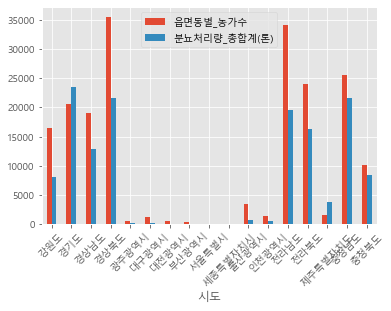

In [575]:
plt.figure(figsize=[10,5])

df[['시도','읍면동별_농가수','분뇨처리량_총합계(톤)']].groupby(by='시도').sum().plot(kind='bar')

plt.xticks(rotation=45)
plt.show()

# 12. 하수처리시설 merge

In [54]:
df.head()

,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적
0,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07
1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06
2,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05
3,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05
4,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05


In [56]:
하수처리 = pd.read_excel('./Data/독립변수_v3/하수처리_v2.xlsx')
하수처리

,시도,시군,읍면동,소재지
0,경기도,고양시 덕양구,현천동,경기도 고양시 덕양구 현천동 692-2
1,서울특별시,성동구,용답동,서울특별시 성동구 용답동 247-6
2,서울특별시,강서구,마곡동,서울특별시 강서구 마곡동 74
3,서울특별시,강남구,일원동,서울특별시 강남구 일원동 580
4,부산광역시,서구,암남동,부산광역시 서구 암남동 704-1
...,...,...,...,...
4009,제주특별자치도,서귀포시,남원읍,제주특별자치도 서귀포시 남원읍 위미리 1051-4번지
4010,제주특별자치도,서귀포시,남원읍,제주특별자치도 서귀포시 남원읍 의귀리 2006번지
4011,제주특별자치도,서귀포시,표선면,제주특별자치도 서귀포시 표선면 가시리 2339-1번지
4012,제주특별자치도,서귀포시,표선면,제주특별자치도 서귀포시 표선면 가시리 3802번지


In [58]:
하수처리['읍면동_new'] = 하수처리['읍면동'].str[:-1]
하수처리

,시도,시군,읍면동,소재지,읍면동_new
0,경기도,고양시 덕양구,현천동,경기도 고양시 덕양구 현천동 692-2,현천
1,서울특별시,성동구,용답동,서울특별시 성동구 용답동 247-6,용답
2,서울특별시,강서구,마곡동,서울특별시 강서구 마곡동 74,마곡
3,서울특별시,강남구,일원동,서울특별시 강남구 일원동 580,일원
4,부산광역시,서구,암남동,부산광역시 서구 암남동 704-1,암남
...,...,...,...,...,...
4009,제주특별자치도,서귀포시,남원읍,제주특별자치도 서귀포시 남원읍 위미리 1051-4번지,남원
4010,제주특별자치도,서귀포시,남원읍,제주특별자치도 서귀포시 남원읍 의귀리 2006번지,남원
4011,제주특별자치도,서귀포시,표선면,제주특별자치도 서귀포시 표선면 가시리 2339-1번지,표선
4012,제주특별자치도,서귀포시,표선면,제주특별자치도 서귀포시 표선면 가시리 3802번지,표선


In [61]:
하수처리.drop(columns=['소재지','읍면동'], inplace=True)

In [75]:
하수처리 = pd.DataFrame(하수처리[['시도','시군','읍면동_new']].value_counts()).reset_index().rename(columns={0:'하수처리시설_개수'})

In [76]:
하수처리

,시도,시군,읍면동_new,하수처리시설_개수
0,경상남도,하동군,화개,15
1,전라남도,여수시,돌산,14
2,충청남도,청양군,비봉,14
3,전라남도,함평군,대동,14
4,전라남도,순천시,별량,13
...,...,...,...,...
1393,경상북도,구미시,도개,1
1394,경상북도,구미시,석적,1
1395,경상북도,구미시,양호,1
1396,전라남도,화순군,남,1


In [78]:
df = pd.merge(df, 하수처리, on=['시도','시군','읍면동_new'], how='left')
df

,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,...,분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수
0,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07,NaN
1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06,NaN
2,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05,NaN
3,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05,NaN
4,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,송산,0.0,7.0,...,0.0,5.567360,1582.0,0.0,0.0,94.0,532.0,0.0,9.854528e+06,NaN
4263,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,동홍,NaN,2.0,...,0.0,0.532800,48.0,0.0,0.0,48.0,0.0,0.0,1.416930e+07,NaN
4264,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,천지,0.0,6.0,...,0.0,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0,7.612721e+06,NaN
4265,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,서홍,NaN,6.0,...,0.0,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0,1.339827e+07,NaN


In [84]:
df['하수처리시설_개수'].fillna(0, inplace=True)
df

,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,...,분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수
0,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0.0
1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0.0
2,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0.0
3,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0.0
4,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,송산,0.0,7.0,...,0.0,5.567360,1582.0,0.0,0.0,94.0,532.0,0.0,9.854528e+06,0.0
4263,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,동홍,NaN,2.0,...,0.0,0.532800,48.0,0.0,0.0,48.0,0.0,0.0,1.416930e+07,0.0
4264,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,천지,0.0,6.0,...,0.0,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0,7.612721e+06,0.0
4265,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,서홍,NaN,6.0,...,0.0,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0,1.339827e+07,0.0


# 13. 분뇨처리업장 merge

## 13-1. 분뇨처리시설 2개의 중복여부 확인 후 제거

In [169]:
처리업_1 = pd.read_excel('./Data/독립변수_v2/2020년도 가축분뇨공공처리시설 운영현황(홈페이지 게시).xlsx')
처리업_2 = pd.read_excel('./Data/독립변수_v3/처리업_추출본.xlsx')

In [170]:
print(처리업_1.columns
,'-'*100,처리업_2.columns)

Index(['시도', '시군', '읍면동_new', '소재지'], dtype='object') ---------------------------------------------------------------------------------------------------- Index(['업종구분명', '시도', '시군', '읍면동'], dtype='object')


In [171]:
처리업_1

,시도,시군,읍면동_new,소재지
0,인천광역시,서구,청라동,인천 서구 중봉대로 211
1,인천광역시,강화군,선원면,인천 강화군 선원면 냉정리 1315
2,강원도,원주시,우산동,강원도 원주시 호저로 113(우산동 505-3)
3,강원도,철원군,갈말읍,강원도 철원군 갈말읍 지포2길 146
4,강원도,홍천군,북방면,강원도 홍천군 북방면 소매곡길 12(소매곡리 산74)
...,...,...,...,...
100,경상남도,함양군,함양읍,경상남도 함양군 함양읍 하림강변길 188(용평리 915-1)
101,경상남도,합천군,대양면,경상남도 합천군 대양면 합천대로 2586-19(정양리 47-1)
102,제주특벽자치도,서귀포시,대정읍,제주특별자치도 서귀포시 대정읍 대한로 366-40
103,제주특벽자치도,제주시,한림읍,제주특별자치도 제주시 한림읍 월각로 506-27


In [172]:
처리업_1['읍면동_new'] = 처리업_1['읍면동_new'].str[:-1]
처리업_1

,시도,시군,읍면동_new,소재지
0,인천광역시,서구,청라,인천 서구 중봉대로 211
1,인천광역시,강화군,선원,인천 강화군 선원면 냉정리 1315
2,강원도,원주시,우산,강원도 원주시 호저로 113(우산동 505-3)
3,강원도,철원군,갈말,강원도 철원군 갈말읍 지포2길 146
4,강원도,홍천군,북방,강원도 홍천군 북방면 소매곡길 12(소매곡리 산74)
...,...,...,...,...
100,경상남도,함양군,함양,경상남도 함양군 함양읍 하림강변길 188(용평리 915-1)
101,경상남도,합천군,대양,경상남도 합천군 대양면 합천대로 2586-19(정양리 47-1)
102,제주특벽자치도,서귀포시,대정,제주특별자치도 서귀포시 대정읍 대한로 366-40
103,제주특벽자치도,제주시,한림,제주특별자치도 제주시 한림읍 월각로 506-27


In [175]:
처리업_2.groupby(by=['시도','시군','읍면동']).count()

업종구분명
시도   시군   읍면동        
강원도  철원군  철원읍       2
     평창군  대관령면      1
     홍천군  북방면       1
경기도  가평군  상면        1
     동두천시 하봉암동      1
...               ...
충청남도 홍성군  구항면       1
          홍성읍       1
충청북도 괴산군  칠성면       3
     보은군  보은읍       3
          삼승면       1

[88 rows x 1 columns]

In [176]:
처리업_2['읍면동'] = 처리업_2['읍면동'].str[:-1]
처리업_2.rename(columns={'읍면동':'읍면동_new'}, inplace=True)
처리업_2

,업종구분명,시도,시군,읍면동_new
0,지정외 폐기물 수집운반업,전라북도,진안군,진안
1,축산분뇨 처리업,경상북도,구미시,선산
2,축산관련 서비스업,강원도,홍천군,북방
3,분뇨 및 축산폐기물 처리업,경상북도,성주군,성주
4,축산분뇨 처리업,경상북도,성주군,초전
...,...,...,...,...
104,폐기물 수집운반업,전라북도,김제시,검산
105,축산분뇨 처리업,충청남도,홍성군,결성
106,분뇨 및 축산분뇨 처리업,경상북도,구미시,고아
107,축산분뇨 처리업,전라북도,김제시,용지


In [177]:
처리업_2 = 처리업_2.groupby(by=['시도','시군','읍면동_new']).count().reset_index()
처리업_2

,시도,시군,읍면동_new,업종구분명
0,강원도,철원군,철원,2
1,강원도,평창군,대관령,1
2,강원도,홍천군,북방,1
3,경기도,가평군,상,1
4,경기도,동두천시,하봉암,1
...,...,...,...,...
83,충청남도,홍성군,구항,1
84,충청남도,홍성군,홍성,1
85,충청북도,괴산군,칠성,3
86,충청북도,보은군,보은,3


In [178]:
처리업_1 = 처리업_1.groupby(by=['시도','시군','읍면동_new']).count().reset_index()
처리업_1

,시도,시군,읍면동_new,소재지
0,강원도,원주시,우산,1
1,강원도,철원군,갈말,1
2,강원도,홍천군,북방,2
3,강원도,횡성군,서원,1
4,경기도,가평군,조종,1
...,...,...,...,...
93,충청북도,보은군,보은,1
94,충청북도,진천군,문백,1
95,충청북도,진천군,초평,1
96,충청북도,청주시,내수,1


In [195]:
pd.concat([처리업_1, 처리업_2]).sort_index()

,시도,시군,읍면동_new,소재지,업종구분명
0,강원도,원주시,우산,1.0,NaN
0,강원도,철원군,철원,NaN,2.0
1,강원도,철원군,갈말,1.0,NaN
1,강원도,평창군,대관령,NaN,1.0
2,강원도,홍천군,북방,2.0,NaN
...,...,...,...,...,...
93,충청북도,보은군,보은,1.0,NaN
94,충청북도,진천군,문백,1.0,NaN
95,충청북도,진천군,초평,1.0,NaN
96,충청북도,청주시,내수,1.0,NaN


In [198]:
처리업 = pd.read_excel('./Data/독립변수_v3/처리업_df.xlsx').drop(columns=['업종구분명'])
처리업

,시도,시군,읍면동_new,소재지
0,강원도,원주시,우산,1
1,강원도,철원군,철원,2
2,강원도,철원군,갈말,1
3,강원도,평창군,대관령,1
4,강원도,홍천군,북방,2
...,...,...,...,...
181,충청북도,보은군,보은,1
182,충청북도,진천군,문백,1
183,충청북도,진천군,초평,1
184,충청북도,청주시,내수,1


In [200]:
처리업['duplicated'] = 처리업[['시도','시군','읍면동_new']].duplicated()
처리업

,시도,시군,읍면동_new,소재지,duplicated
0,강원도,원주시,우산,1,False
1,강원도,철원군,철원,2,False
2,강원도,철원군,갈말,1,False
3,강원도,평창군,대관령,1,False
4,강원도,홍천군,북방,2,False
...,...,...,...,...,...
181,충청북도,보은군,보은,1,True
182,충청북도,진천군,문백,1,False
183,충청북도,진천군,초평,1,False
184,충청북도,청주시,내수,1,False


In [203]:
처리업['dupl-False'] = 처리업[['시도','시군','읍면동_new']].duplicated(keep=False)
처리업

,시도,시군,읍면동_new,소재지,duplicated,dupl-False
0,강원도,원주시,우산,1,False,False
1,강원도,철원군,철원,2,False,False
2,강원도,철원군,갈말,1,False,False
3,강원도,평창군,대관령,1,False,False
4,강원도,홍천군,북방,2,False,True
...,...,...,...,...,...,...
181,충청북도,보은군,보은,1,True,True
182,충청북도,진천군,문백,1,False,False
183,충청북도,진천군,초평,1,False,False
184,충청북도,청주시,내수,1,False,False


In [206]:
처리업.drop(columns=['dupl-False'], inplace=True)

In [207]:
처리업

,시도,시군,읍면동_new,소재지,duplicated
0,강원도,원주시,우산,1,False
1,강원도,철원군,철원,2,False
2,강원도,철원군,갈말,1,False
3,강원도,평창군,대관령,1,False
4,강원도,홍천군,북방,2,False
...,...,...,...,...,...
181,충청북도,보은군,보은,1,True
182,충청북도,진천군,문백,1,False
183,충청북도,진천군,초평,1,False
184,충청북도,청주시,내수,1,False


In [209]:
처리업[처리업['duplicated'] == True].index

Int64Index([5, 42, 51, 69, 91, 97, 120, 139, 147, 149, 156, 176, 179, 181], dtype='int64')

In [211]:
처리업.drop(처리업[처리업['duplicated'] == True].index, inplace=True)
처리업

,시도,시군,읍면동_new,소재지,duplicated
0,강원도,원주시,우산,1,False
1,강원도,철원군,철원,2,False
2,강원도,철원군,갈말,1,False
3,강원도,평창군,대관령,1,False
4,강원도,홍천군,북방,2,False
...,...,...,...,...,...
180,충청북도,괴산군,괴산,1,False
182,충청북도,진천군,문백,1,False
183,충청북도,진천군,초평,1,False
184,충청북도,청주시,내수,1,False


In [214]:
처리업 = 처리업.drop(columns=['duplicated']).rename(columns={'소재지':'분뇨처리업장_개수'})
처리업

,시도,시군,읍면동_new,분뇨처리업장_개수
0,강원도,원주시,우산,1
1,강원도,철원군,철원,2
2,강원도,철원군,갈말,1
3,강원도,평창군,대관령,1
4,강원도,홍천군,북방,2
...,...,...,...,...
180,충청북도,괴산군,괴산,1
182,충청북도,진천군,문백,1
183,충청북도,진천군,초평,1
184,충청북도,청주시,내수,1


In [215]:
처리업.rename(columns={'분뇨처리업장_개수':'분뇨처리시설_개수'})
처리업

,시도,시군,읍면동_new,분뇨처리업장_개수
0,강원도,원주시,우산,1
1,강원도,철원군,철원,2
2,강원도,철원군,갈말,1
3,강원도,평창군,대관령,1
4,강원도,홍천군,북방,2
...,...,...,...,...
180,충청북도,괴산군,괴산,1
182,충청북도,진천군,문백,1
183,충청북도,진천군,초평,1
184,충청북도,청주시,내수,1


## 13-2. merge

In [217]:
df.columns

Index(['수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도', '시도', '시군', '읍면동',
       '읍면동_new', '폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우', '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리',
       '읍면동_면적', '하수처리시설_개수'],
      dtype='object')

In [230]:
df = pd.merge(df, 처리업, on=['시도','읍면동_new'], how='left')
df

,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군_x,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,...,두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,시군_y,분뇨처리업장_개수
0,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0.0,NaN,NaN
1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0.0,NaN,NaN
2,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0.0,NaN,NaN
3,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0.0,NaN,NaN
4,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,송산,0.0,7.0,...,1582.0,0.0,0.0,94.0,532.0,0.0,9.854528e+06,0.0,NaN,NaN
4264,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,동홍,NaN,2.0,...,48.0,0.0,0.0,48.0,0.0,0.0,1.416930e+07,0.0,NaN,NaN
4265,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,천지,0.0,6.0,...,1223.0,65.0,0.0,0.0,1158.0,0.0,7.612721e+06,0.0,NaN,NaN
4266,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,서홍,NaN,6.0,...,1223.0,65.0,0.0,0.0,1158.0,0.0,1.339827e+07,0.0,NaN,NaN


In [236]:
df = df.drop(columns=['시군_y']).rename(columns={'시군_x':'시군'})
df

,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,...,분뇨처리량_퇴비화(톤),두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수
0,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0.0,NaN
1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0.0,NaN
2,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0.0,NaN
3,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0.0,NaN
4,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,송산,0.0,7.0,...,5.567360,1582.0,0.0,0.0,94.0,532.0,0.0,9.854528e+06,0.0,NaN
4264,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,동홍,NaN,2.0,...,0.532800,48.0,0.0,0.0,48.0,0.0,0.0,1.416930e+07,0.0,NaN
4265,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,천지,0.0,6.0,...,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0,7.612721e+06,0.0,NaN
4266,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,서홍,NaN,6.0,...,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0,1.339827e+07,0.0,NaN


<AxesSubplot:>

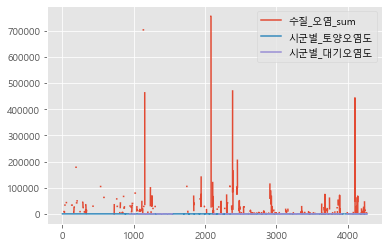

In [242]:
df[['시도','수질_오염_sum','시군별_토양오염도','시군별_대기오염도']].plot()

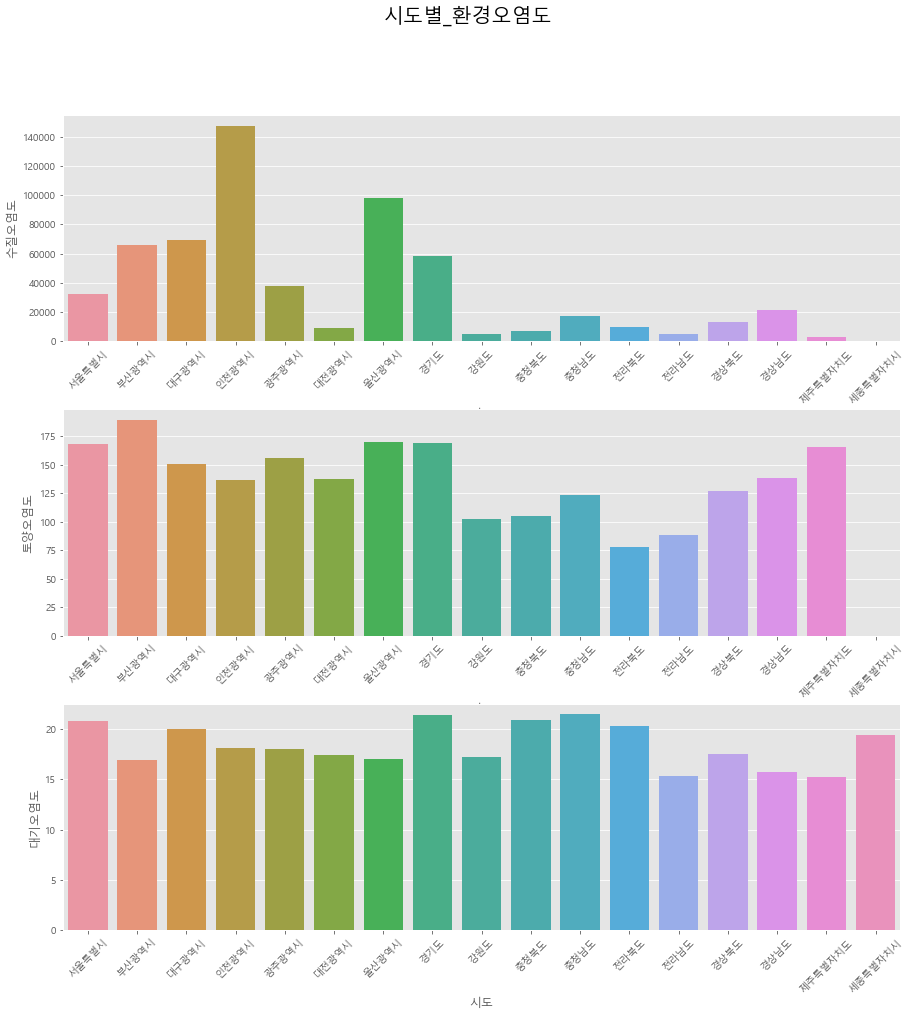

In [322]:
plt.figure(figsize=[15,15])
plt.subplots_adjust(wspace=0.4,hspace=0.3)

plt.subplot(311)
sns.barplot(x='시도',y='수질_오염_sum',data=df, ci=False)
plt.xticks(rotation=45)
plt.ylabel('수질오염도')

plt.subplot(312)
sns.barplot(x='시도',y='시군별_토양오염도',data=df, ci=False)
plt.xticks(rotation=45)
plt.ylabel('토양오염도')

plt.subplot(313)
sns.barplot(x='시도',y='시군별_대기오염도',data=df, ci=False)
plt.xticks(rotation=45)
plt.ylabel('대기오염도')

plt.suptitle('시도별_환경오염도', fontsize=20)
plt.show()

In [265]:
df.columns

Index(['수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도', '시도', '시군', '읍면동',
       '읍면동_new', '폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우', '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리',
       '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수'],
      dtype='object')

# 14. 인구수 merge

In [325]:
인구 = pd.read_excel('./Data/독립변수_v3/2020_읍면동_인구.xlsx')
인구

,시도,시군,읍면동,읍면동_총거주자수
0,서울특별시,NaN,NaN,"9,505,868"
1,서울특별시,종로구,NaN,"144,017"
2,서울특별시,종로구,청운효자동,"12,057"
3,서울특별시,종로구,사직동,"9,080"
4,서울특별시,종로구,삼청동,"2,492"
...,...,...,...,...
3841,제주특별자치도,서귀포시,서홍동,"10,572"
3842,제주특별자치도,서귀포시,대륜동,"14,651"
3843,제주특별자치도,서귀포시,대천동,"13,851"
3844,제주특별자치도,서귀포시,중문동,"11,522"


In [331]:
인구[인구['읍면동'].isna()==True].index

Int64Index([   0,    1,   19,   35,   52,   70,   86,  101,  118,  139,
            ...
            3705, 3720, 3731, 3745, 3757, 3769, 3782, 3800, 3801, 3828],
           dtype='int64', length=279)

In [333]:
인구.drop(인구[인구['읍면동'].isna()==True].index, inplace=True)

In [336]:
인구['읍면동_new'] = 인구['읍면동'].str[:-1]
인구

,시도,시군,읍면동,읍면동_총거주자수,읍면동_new
2,서울특별시,종로구,청운효자동,"12,057",청운효자
3,서울특별시,종로구,사직동,"9,080",사직
4,서울특별시,종로구,삼청동,"2,492",삼청
5,서울특별시,종로구,부암동,"9,669",부암
6,서울특별시,종로구,평창동,"17,918",평창
...,...,...,...,...,...
3841,제주특별자치도,서귀포시,서홍동,"10,572",서홍
3842,제주특별자치도,서귀포시,대륜동,"14,651",대륜
3843,제주특별자치도,서귀포시,대천동,"13,851",대천
3844,제주특별자치도,서귀포시,중문동,"11,522",중문


In [338]:
인구.drop(columns=['읍면동'], inplace=True)

In [339]:
인구

,시도,시군,읍면동_총거주자수,읍면동_new
2,서울특별시,종로구,"12,057",청운효자
3,서울특별시,종로구,"9,080",사직
4,서울특별시,종로구,"2,492",삼청
5,서울특별시,종로구,"9,669",부암
6,서울특별시,종로구,"17,918",평창
...,...,...,...,...
3841,제주특별자치도,서귀포시,"10,572",서홍
3842,제주특별자치도,서귀포시,"14,651",대륜
3843,제주특별자치도,서귀포시,"13,851",대천
3844,제주특별자치도,서귀포시,"11,522",중문


In [345]:
df = pd.merge(df, 인구, on=['시도','시군','읍면동_new'], how='left')
df

,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,읍면동_new,폭염일수_2020,읍면동별_농가수,...,두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수
0,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,청운효자,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0.0,NaN,"12,057"
1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,종로1.2.3.4가,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0.0,NaN,"6,535"
2,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,종로5.6가,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0.0,NaN,"5,050"
3,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,창신제1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0.0,NaN,"4,821"
4,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,창신제2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0.0,NaN,"8,062"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,송산,0.0,7.0,...,1582.0,0.0,0.0,94.0,532.0,0.0,9.854528e+06,0.0,NaN,"4,083"
4273,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,동홍,NaN,2.0,...,48.0,0.0,0.0,48.0,0.0,0.0,1.416930e+07,0.0,NaN,"23,102"
4274,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,천지,0.0,6.0,...,1223.0,65.0,0.0,0.0,1158.0,0.0,7.612721e+06,0.0,NaN,"3,445"
4275,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,서홍,NaN,6.0,...,1223.0,65.0,0.0,0.0,1158.0,0.0,1.339827e+07,0.0,NaN,"10,572"


In [350]:
df.drop(columns=['읍면동_new'], inplace=True)

In [351]:
# df.to_excel('Basic_dataset.xlsx', encoding='utf-8-sig')